In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=dbd0736b50d950b72cfb07fd12e036604eec550537b4bfc2506c3c286324927e
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

Initial state of qubit 0:


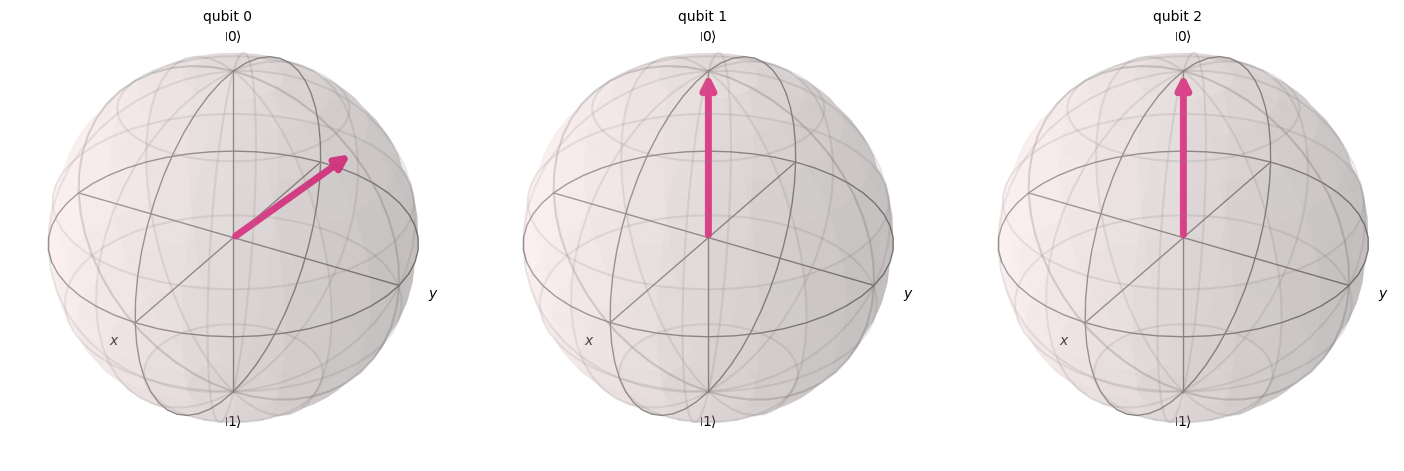

In [8]:
# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
# Task 1
theta, phi = np.pi/4, np.pi/2
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

Initial state of Alice’s qubit (q0):

Fidelity between initial and teleported states: 0.375000
Bloch-sphere visualization confirming successful teleportation.


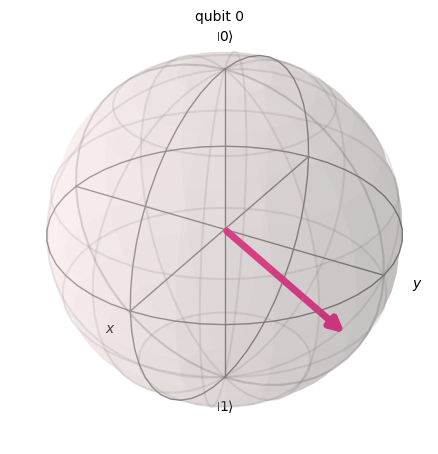

In [23]:
!pip install qiskit qiskit-aer --quiet

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Task 2
q = QuantumRegister(3, "q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q, c)
theta, phi = np.pi / 4, np.pi / 3
qc.ry(theta, 0)
qc.rz(phi, 0)
sv_full = Statevector.from_instruction(qc)
rho_alice_init = partial_trace(sv_full, [1, 2])
print("Initial state of Alice’s qubit (q0):")
plot_bloch_multivector(rho_alice_init)

qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

with qc.if_test((c, 1)):
    qc.x(2)
with qc.if_test((c, 2)):
    qc.z(2)
with qc.if_test((c, 3)):
    qc.x(2)
    qc.z(2)

qc.save_statevector()
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
sv_final = Statevector(result.data(0)["statevector"])

rho_bob_final = partial_trace(sv_final, [0, 1])
fidelity = state_fidelity(rho_alice_init, rho_bob_final)
print(f"\nFidelity between initial and teleported states: {fidelity:.6f}")
print("Bloch-sphere visualization confirming successful teleportation.")

plot_bloch_multivector(rho_bob_final)


=== Trial 1 ===
Theta = 1.301, Phi = 5.818
Initial state of Alice’s qubit (q0):


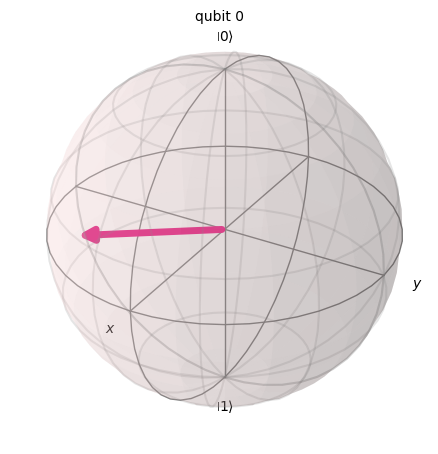

Fidelity between initial and teleported states: 0.187116
Bloch sphere of Bob’s final qubit (q2):


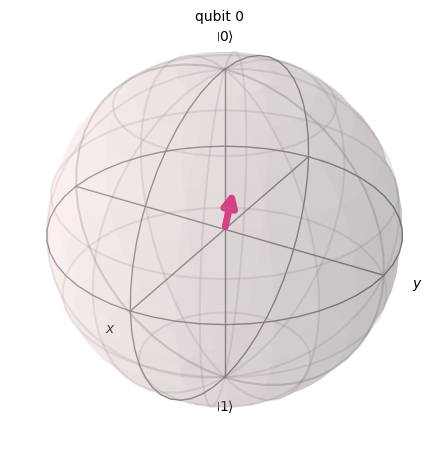


=== Trial 2 ===
Theta = 0.619, Phi = 4.752
Initial state of Alice’s qubit (q0):


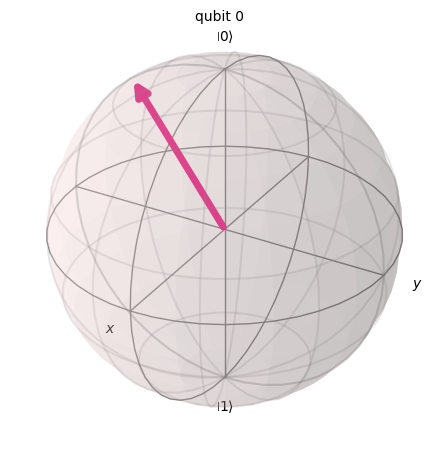

Fidelity between initial and teleported states: 1.000000
Bloch sphere of Bob’s final qubit (q2):


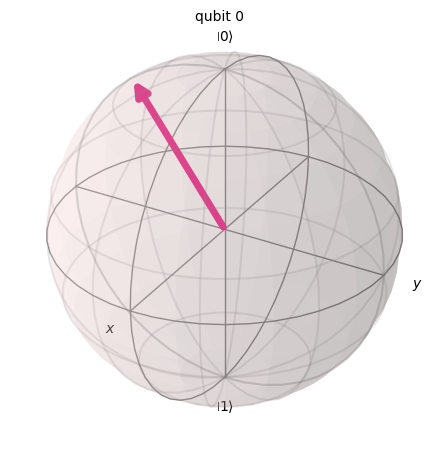


=== Trial 3 ===
Theta = 0.294, Phi = 0.627
Initial state of Alice’s qubit (q0):


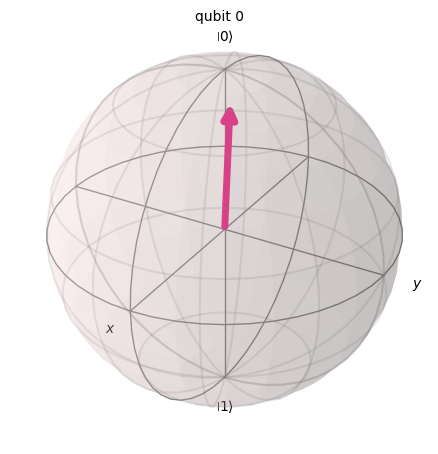

Fidelity between initial and teleported states: 1.000000
Bloch sphere of Bob’s final qubit (q2):


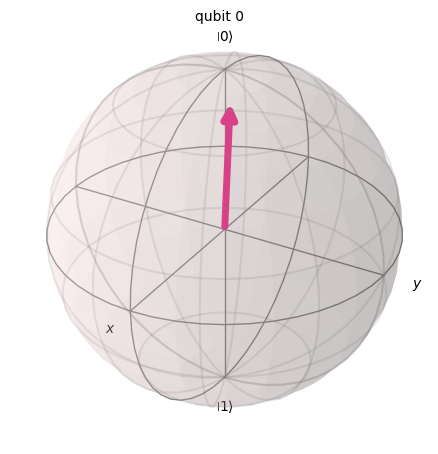


=== Trial 4 ===
Theta = 1.950, Phi = 4.024
Initial state of Alice’s qubit (q0):


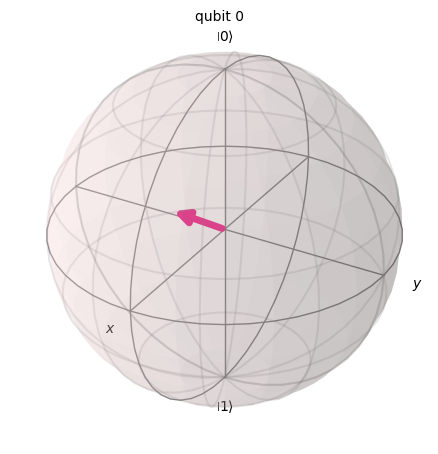

Fidelity between initial and teleported states: 1.000000
Bloch sphere of Bob’s final qubit (q2):


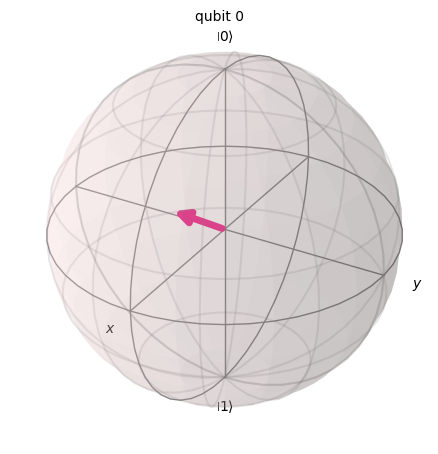


=== Trial 5 ===
Theta = 2.714, Phi = 2.334
Initial state of Alice’s qubit (q0):


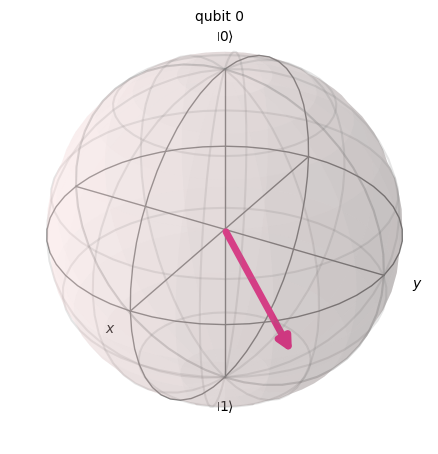

Fidelity between initial and teleported states: 1.000000
Bloch sphere of Bob’s final qubit (q2):


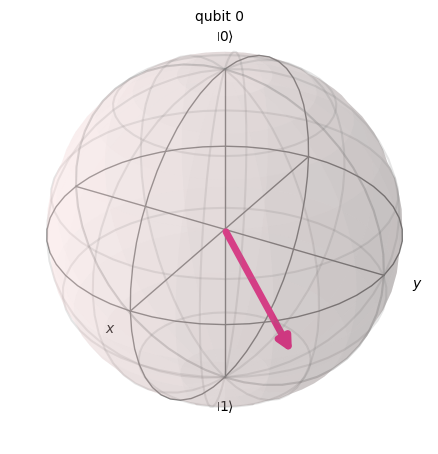

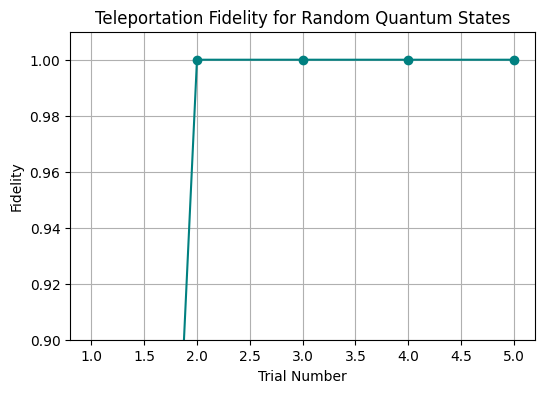


Average Fidelity: 0.837423148928174


In [26]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, clear_output
# Task 3
sim = AerSimulator()
fidelities = []

num_trials = 5

for i in range(num_trials):

    theta, phi = np.random.rand() * np.pi, np.random.rand() * 2 * np.pi
    q = QuantumRegister(3, "q")
    c = ClassicalRegister(2, "c")
    qc = QuantumCircuit(q, c)

    qc.ry(theta, 0)
    qc.rz(phi, 0)

    sv_init = Statevector.from_instruction(qc)
    rho_alice = partial_trace(sv_init, [1, 2])

    print(f"\n=== Trial {i+1} ===")
    print(f"Theta = {theta:.3f}, Phi = {phi:.3f}")
    print("Initial state of Alice’s qubit (q0):")
    display(plot_bloch_multivector(rho_alice))

    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])
    with qc.if_test((c, 1)):
        qc.x(2)
    with qc.if_test((c, 2)):
        qc.z(2)
    with qc.if_test((c, 3)):
        qc.x(2)
        qc.z(2)

    qc.save_statevector()
    compiled = transpile(qc, sim)
    result = sim.run(compiled).result()
    sv_final = Statevector(result.data(0)["statevector"])


    rho_bob = partial_trace(sv_final, [0, 1])
    fidelity = state_fidelity(rho_alice, rho_bob)
    fidelities.append(fidelity)

    print(f"Fidelity between initial and teleported states: {fidelity:.6f}")
    print("Bloch sphere of Bob’s final qubit (q2):")
    display(plot_bloch_multivector(rho_bob))

plt.figure(figsize=(6, 4))
plt.plot(range(1, num_trials + 1), fidelities, marker='o', color='teal')
plt.xlabel("Trial Number")
plt.ylabel("Fidelity")
plt.title("Teleportation Fidelity for Random Quantum States")
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.show()

print("\nAverage Fidelity:", np.mean(fidelities))

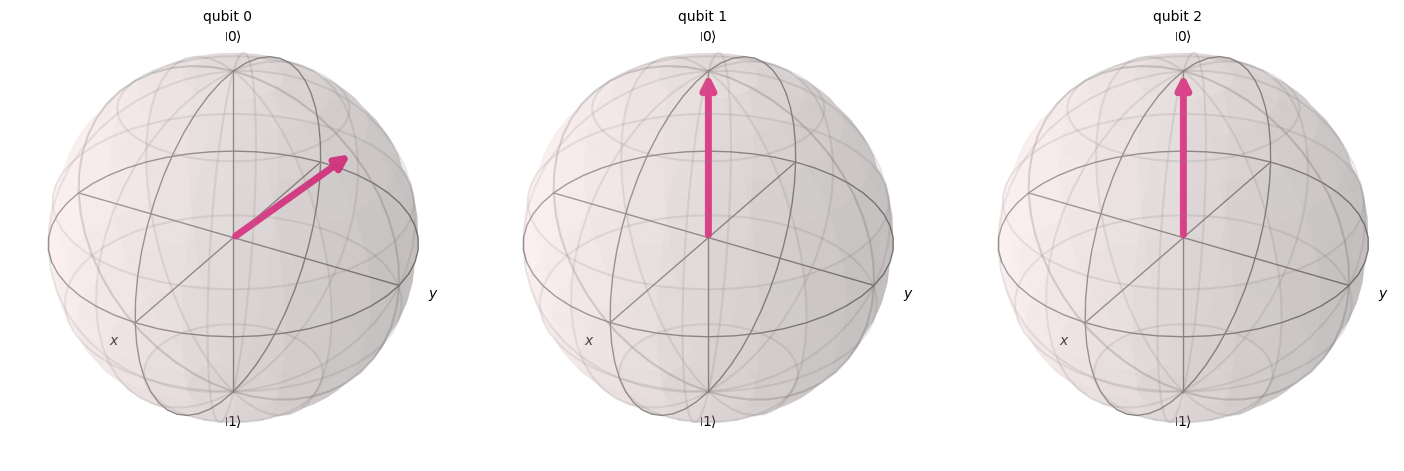

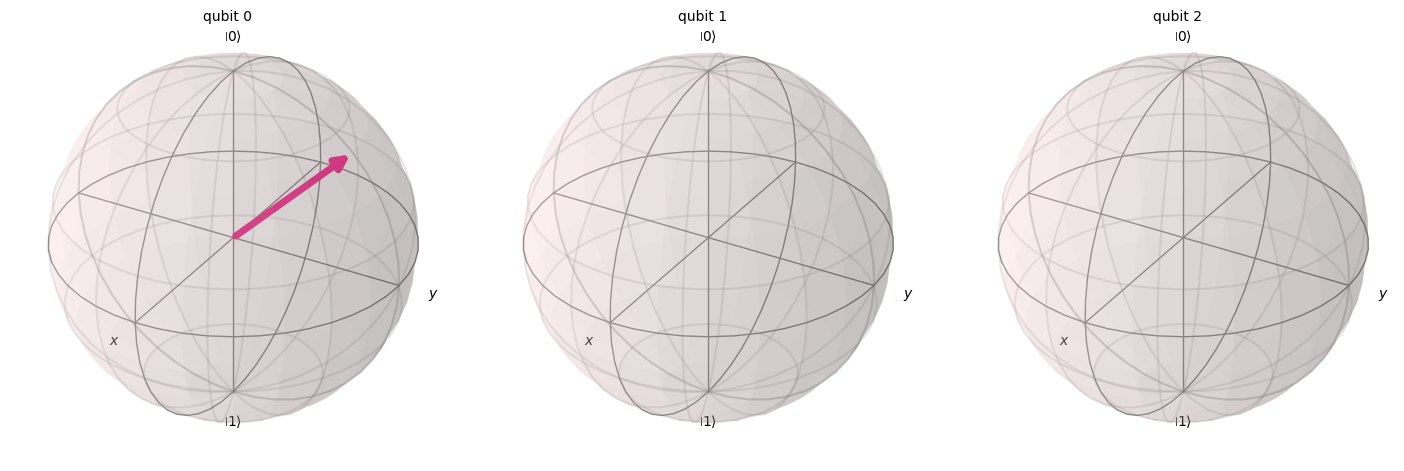

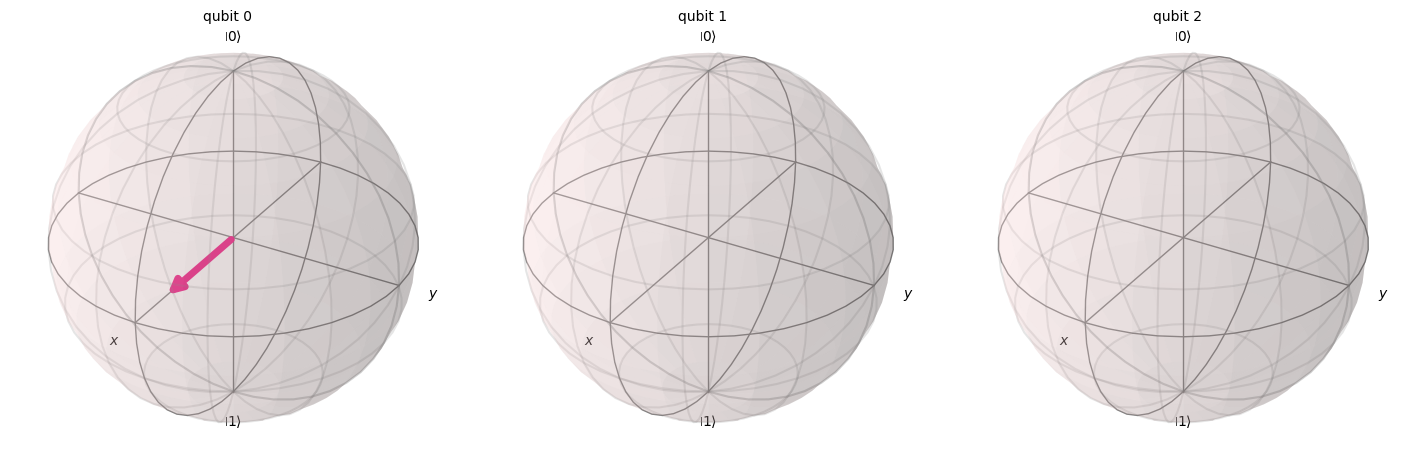

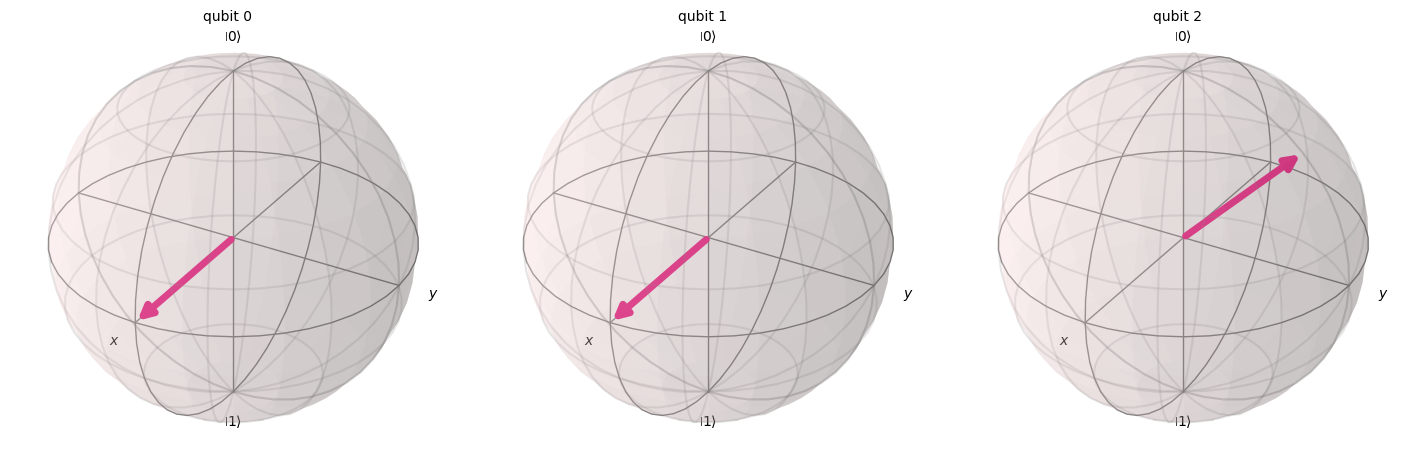

In [27]:
qc = QuantumCircuit(3)
theta, phi = np.pi/4, np.pi/2
# Task4
qc.ry(theta, 0)
qc.rz(phi, 0)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))
qc.h(1)
qc.cx(1, 2)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))
qc.cx(0, 1)
qc.h(0)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))
qc.cx(1, 2)
qc.cz(0, 2)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))

🟢 Ideal Teleportation Bloch Spheres:


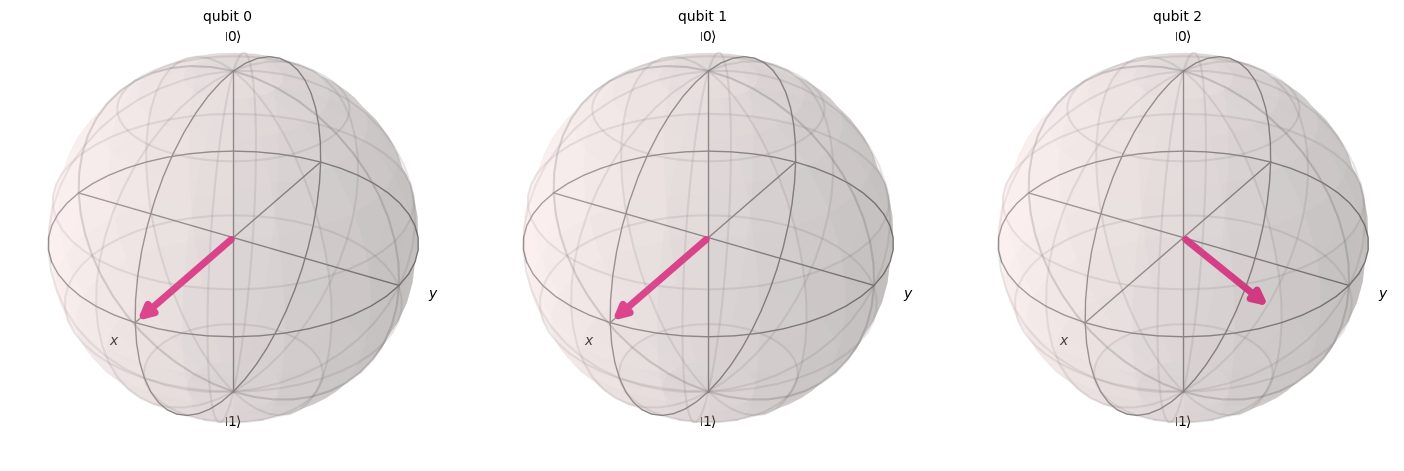

🔵 Noisy Teleportation Bloch Spheres:


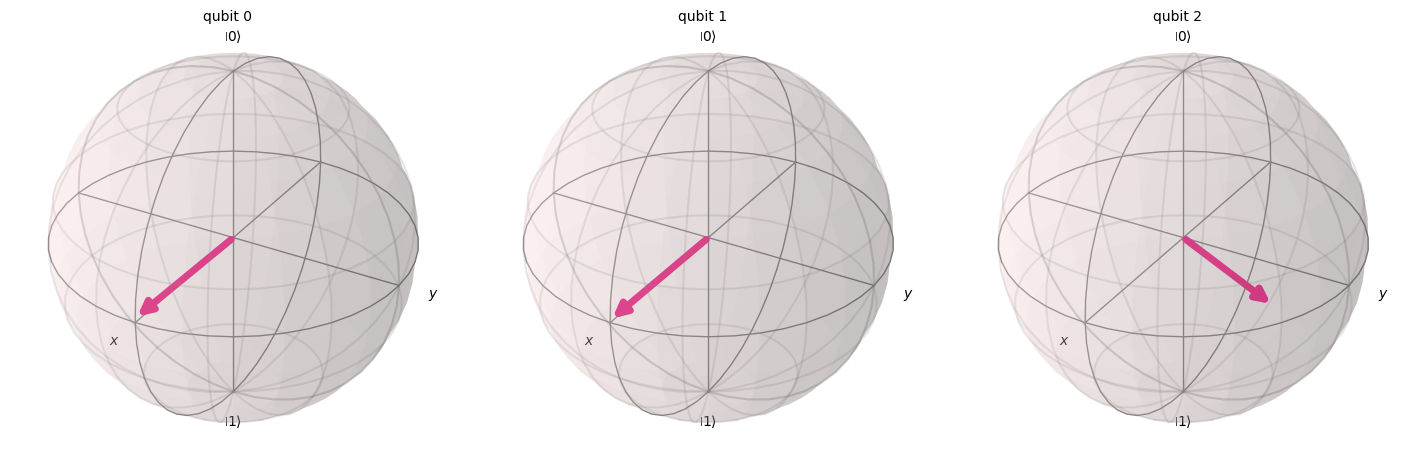

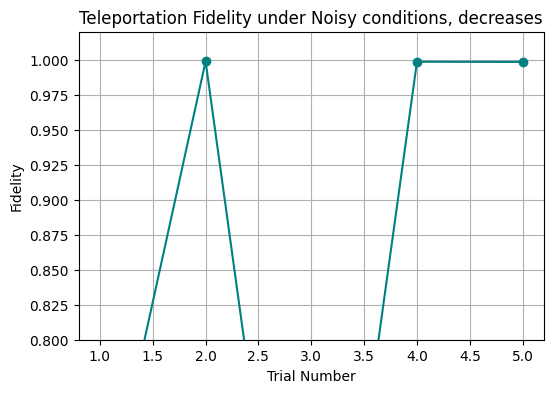

In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace, random_statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

# Task 5
noise_model = NoiseModel()
error_1 = depolarizing_error(0.03, 1)
error_2 = depolarizing_error(0.03, 2)
amp_damp_1q = amplitude_damping_error(0.05)
amp_damp_2q = amp_damp_1q.tensor(amp_damp_1q)
noise_model.add_all_qubit_quantum_error(error_1, ['x', 'z', 'h'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
noise_model.add_all_qubit_quantum_error(amp_damp_2q, ['cx'])

sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=noise_model)

def teleport_state(state):
    qc = QuantumCircuit(3)
    qc.initialize(state.data, 0)
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.save_statevector()
    return qc

state = random_statevector(2)
qc = teleport_state(state)
res_ideal = sim_ideal.run(transpile(qc, sim_ideal)).result()
ideal_state = Statevector(res_ideal.data(0)["statevector"])
res_noisy = sim_noisy.run(transpile(qc, sim_noisy)).result()
noisy_state = Statevector(res_noisy.data(0)["statevector"])

print("🟢 Ideal Teleportation Bloch Spheres:")
display(plot_bloch_multivector(ideal_state))

print("🔵 Noisy Teleportation Bloch Spheres:")
display(plot_bloch_multivector(noisy_state))

fidelities = []
num_trials = 5

for _ in range(num_trials):
    state = random_statevector(2)
    qc = teleport_state(state)
    res_ideal = sim_ideal.run(transpile(qc, sim_ideal)).result()
    res_noisy = sim_noisy.run(transpile(qc, sim_noisy)).result()
    ideal_state = Statevector(res_ideal.data(0)["statevector"])
    noisy_state = Statevector(res_noisy.data(0)["statevector"])
    rho_ideal = partial_trace(ideal_state, [0, 1])
    rho_noisy = partial_trace(noisy_state, [0, 1])
    fidelity = state_fidelity(rho_ideal, rho_noisy)
    fidelities.append(fidelity)

plt.figure(figsize=(6,4))
plt.plot(range(1, num_trials+1), fidelities, marker='o', color='teal')
plt.title("Teleportation Fidelity under Noisy conditions, decreases")
plt.xlabel("Trial Number")
plt.ylabel("Fidelity")
plt.ylim(0.80, 1.02)
plt.grid(True)
plt.show()